### 股票预测小案例
我们要做股票的预测，针对于历史数据来预测股价的走势。在这里，我们要解决的具体问题为：给定历史数据来预测5天之后的股价。 
这个问题是经典的回归问题，所以可以使用线性回归模型来解决。 

在这个项目中，需要做如下的几件事情：
1. 读取某一只股票行情数据，并试着理解每一个字段的含义
2. 对于读取之后的数据，做一些必要的预处理（如排序，去掉NAN，把字符串转换成日期等）
3. 提取特征值和预测值，分别保存为X, y两个变量中
4. 把数据分为训练和测试数据
5. 在训练数据中训练模型，在测试数据中测试模型的效果
6. 做简单的可视化展示
7. 分析特征的重要性，这部分可以从学出来的权重获得。 

在标记为```TODO```的地方，填写必要的代码

### 1. 数据的读取和数据预处理

In [20]:
# 导入必要的库
import numpy as np # 数学计算
import pandas as pd # 数据处理, 读取 CSV 文件 (e.g. pd.read_csv)
import matplotlib.pyplot as plt # 可视化工具
from datetime import datetime as dt  # 时间的工具
from sklearn import preprocessing  # 归一化时用到

In [ ]:
# 对于股票数据，你可以使用如下的方法下载某一个公司的股票交易历史
# 000001 为平安银行
# 如果你还没有安装, 可以使用 pip install tushare 安装tushare python包
# import tushare as ts
# df = ts.get_hist_data('000001')
# print(df)
# df.to_csv('000001.csv')

In [21]:
# 读取股票代码为000001的行情数据
df = pd.read_csv('./000001.csv') 

In [22]:
print(np.shape(df))
df.head()

(611, 14)


,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
1,2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2,2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
3,2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
4,2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98


股票数据的特征

* date：日期
* open：开盘价
* high：最高价
* close：收盘价
* low：最低价
* volume：成交量
* price_change：价格变动
* p_change：涨跌幅
* ma5：5日均价
* ma10：10日均价
* ma20:20日均价
* v_ma5:5日均量
* v_ma10:10日均量
* v_ma20:20日均量

In [5]:
# 将每一个数据的键值的类型从字符串转为日期，并把date字段设置为index
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')

# TODO: 按照时间升序排列数据, 使用df中的sort_values函数
#
#
df.sort_values(by=['date'], ascending=True)
df.head(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-05-30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98
2019-05-23,12.24,12.42,12.29,12.14,666855.44,-0.11,-0.89,12.414,12.531,13.014,731146.55,851153.75,1069202.04
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97


In [6]:
# 检测是否有缺失数据 NaNs
df.dropna(axis=0 , inplace=True)
df.isna().sum()

open            0
high            0
close           0
low             0
volume          0
price_change    0
p_change        0
ma5             0
ma10            0
ma20            0
v_ma5           0
v_ma10          0
v_ma20          0
dtype: int64

In [7]:
min_date = df.index.min()
max_date = df.index.max()
print ("First date is",min_date)
print ("Last date is",max_date)

First date is 2016-11-29 00:00:00
Last date is 2019-05-30 00:00:00


### 2. 构建特征向量X和预测值y 

In [8]:
# 创建新的一列（预测值）。预测值为5天之后的收盘价，使用shift函数来实现。 
# TODO： 
num = 5 # 预测5天后的情况
df['label'] = df['close'].shift(-num)
print(df.shape)

(611, 14)


In [9]:
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2016-12-12,9.65,9.77,9.50,9.44,1256874.00,-0.15,-1.55,9.528,9.542,9.542,907766.59,869263.18,869263.18,9.46
2016-12-09,9.50,9.75,9.65,9.48,1514199.25,0.13,1.37,9.520,9.547,9.547,809264.93,826195.31,826195.31,9.55
2016-12-08,9.50,9.55,9.52,9.43,671452.19,0.04,0.42,9.500,9.534,9.534,672362.38,740194.81,740194.81,9.60
2016-12-07,9.48,9.49,9.48,9.41,493404.75,-0.01,-0.10,9.516,9.536,9.536,667272.81,750015.19,750015.19,9.55
2016-12-06,9.48,9.52,9.49,9.45,602902.75,0.03,0.32,9.530,9.545,9.545,773784.48,792783.60,792783.60,9.62
2016-12-05,9.50,9.54,9.46,9.41,764365.69,-0.09,-0.94,9.556,9.556,9.556,830759.76,830759.76,830759.76,NaN
2016-12-02,9.60,9.60,9.55,9.44,829686.50,-0.05,-0.52,9.580,9.580,9.580,847358.28,847358.28,847358.28,NaN
2016-12-01,9.57,9.63,9.60,9.55,646004.38,0.05,0.52,9.590,9.590,9.590,853248.88,853248.88,853248.88,NaN
2016-11-30,9.65,9.72,9.55,9.50,1025963.06,-0.07,-0.73,9.585,9.585,9.585,956871.13,956871.13,956871.13,NaN


In [10]:
# 由于数据往前移了5位，所以最后5个样本的label值为"NA"，在这里去掉包含”NA"的样本。 
df.dropna(inplace=True)
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2016-12-19,9.22,9.23,9.20,9.17,494010.62,-0.05,-0.54,9.304,9.416,9.463,592382.96,750074.77,776969.77,9.50
2016-12-16,9.24,9.29,9.25,9.21,396813.97,0.00,0.00,9.364,9.442,9.481,744955.63,777110.28,797181.14,9.65
2016-12-15,9.37,9.41,9.25,9.21,827612.88,-0.15,-1.60,9.444,9.472,9.499,968432.69,820397.53,827978.61,9.52
2016-12-14,9.42,9.51,9.40,9.40,597705.75,-0.02,-0.21,9.498,9.507,9.520,937200.55,802236.68,828009.09,9.48
2016-12-13,9.48,9.50,9.42,9.33,645771.56,-0.08,-0.84,9.514,9.522,9.531,916340.35,845062.41,848945.76,9.49
2016-12-12,9.65,9.77,9.50,9.44,1256874.00,-0.15,-1.55,9.528,9.542,9.542,907766.59,869263.18,869263.18,9.46
2016-12-09,9.50,9.75,9.65,9.48,1514199.25,0.13,1.37,9.520,9.547,9.547,809264.93,826195.31,826195.31,9.55
2016-12-08,9.50,9.55,9.52,9.43,671452.19,0.04,0.42,9.500,9.534,9.534,672362.38,740194.81,740194.81,9.60
2016-12-07,9.48,9.49,9.48,9.41,493404.75,-0.01,-0.10,9.516,9.536,9.536,667272.81,750015.19,750015.19,9.55


In [12]:
# 构建特征向量X，也就是数据中的X。由于我们要预测df['label']值，需要先去掉，不然就失去预测意义了。 另外，
# 在本次预测任务中先不考虑"price_change"和"p_change"两个字段。 
X = df.drop(['price_change', 'label', 'p_change'],axis=1)
X = X.values

# TODO： 使用z-score normalization做归一化，参考preprocessing模块里的scale函数的使用
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [13]:
# 提取预测值
y = df.label.values

In [14]:
print(np.shape(X), np.shape(y))

(606, 11) (606,)


In [15]:
# 把数据分为训练和测试数据。我们把一开始的550个样本作为训练数据，之后的样本作为
# 测试数据
X_train, y_train = X[0:550, :], y[0:550]
X_test, y_test = X[550:606,:], y[550:606]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(550, 11)
(550,)
(56, 11)
(56,)


### 3. 训练模型

In [16]:
# 训练线性回归模型

# TODO：导入相应的线性回归库
from sklearn.linear_model import LinearRegression

# TODO: 在训练数据上训练线性回归模型
lr = LinearRegression().fit(X_train, y_train)


In [17]:
lr.score(X_test, y_test) # 使用绝对系数 R^2 评估模型

0.5757720373136974

### 4. 可视化结果（预测值 vs 真实值）

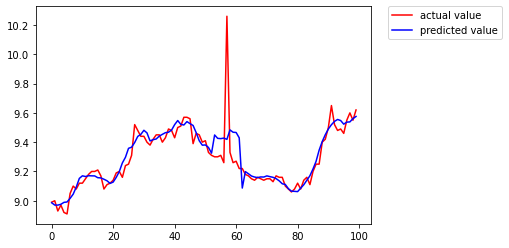

In [18]:
# 输出针对最后五个样本的预测，以及真实值
x_predict = X[-100:]  # 选取最新的100个样本
forcast = lr.predict(x_predict) # 预测

plt.plot(y[-100:], color='r' , label="actual value")  
plt.plot(forcast, color='b', label="predicted value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

### 5. 观察模型的权重。在线性回归中，权重（绝对值）越大，就意味着跟预测值之间的关系就越大

In [19]:
# 理解模型，查看哪些特征对结果的影响比较大
for idx, col_name in enumerate(['open', 'high', 'close', 'low', 'volume', 'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20']):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for open is -0.5878460328709414
The coefficient for high is 0.11931552796494782
The coefficient for close is -0.5669576943952087
The coefficient for low is 0.13126837453429413
The coefficient for volume is 0.006222008041351701
The coefficient for ma5 is 0.5774263267325093
The coefficient for ma10 is 2.136380223697078
The coefficient for ma20 is -0.2602932313885301
The coefficient for v_ma5 is -0.026737051859456545
The coefficient for v_ma10 is 0.04648972695646869
The coefficient for v_ma20 is -0.03209024871521443
